In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pandas.plotting import scatter_matrix
import seaborn as sns
from IPython.display import set_matplotlib_formats, HTML
from matplotlib.dates import DateFormatter
import matplotlib_inline 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib import colors as mcolors
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore') 

In [3]:
# Formating Plots
# default styles
def set_sns_format(width=14, height=8):
    sns.set_theme(palette='pastel', context='notebook',rc={'savefig.dpi':300})
    matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
    matplotlib.rcParams['figure.figsize'] = (width, height)
    return None
set_sns_format(width=14, height=8)

In [4]:
def add_value_labels(ax, typ, spacing=5):
    #This function add the labels in the bar and line plots
    #input the ax to add the labels, the type of plot
    
    space = spacing
    va = 'bottom'
    

    if typ == 'bar':
        for i in ax.patches:
            y_value = i.get_height()
            x_value = i.get_x() + i.get_width() / 2

            label = "{:.0f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                    textcoords="offset points", ha='center', va=va, fontsize=10)     

    if typ == 'line':
        for line in ax.lines:
            for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
                label = "{:.0f}".format(y_value)
                ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                    textcoords="offset points", ha='center', va=va, fontsize=10)

In [5]:
df = pd.read_csv(r"C:\Users\ssai\OneDrive\Data_26-07\labs\lab-data-cleaning-and-wrangling\files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")

In [6]:
df = df.drop("Customer", axis = 1)
df.rename(columns=lambda col: col.replace(' ', '_').lower(), inplace=True)
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])
numerical_df = df.select_dtypes(np.number)
categorical_df = df.select_dtypes(object)

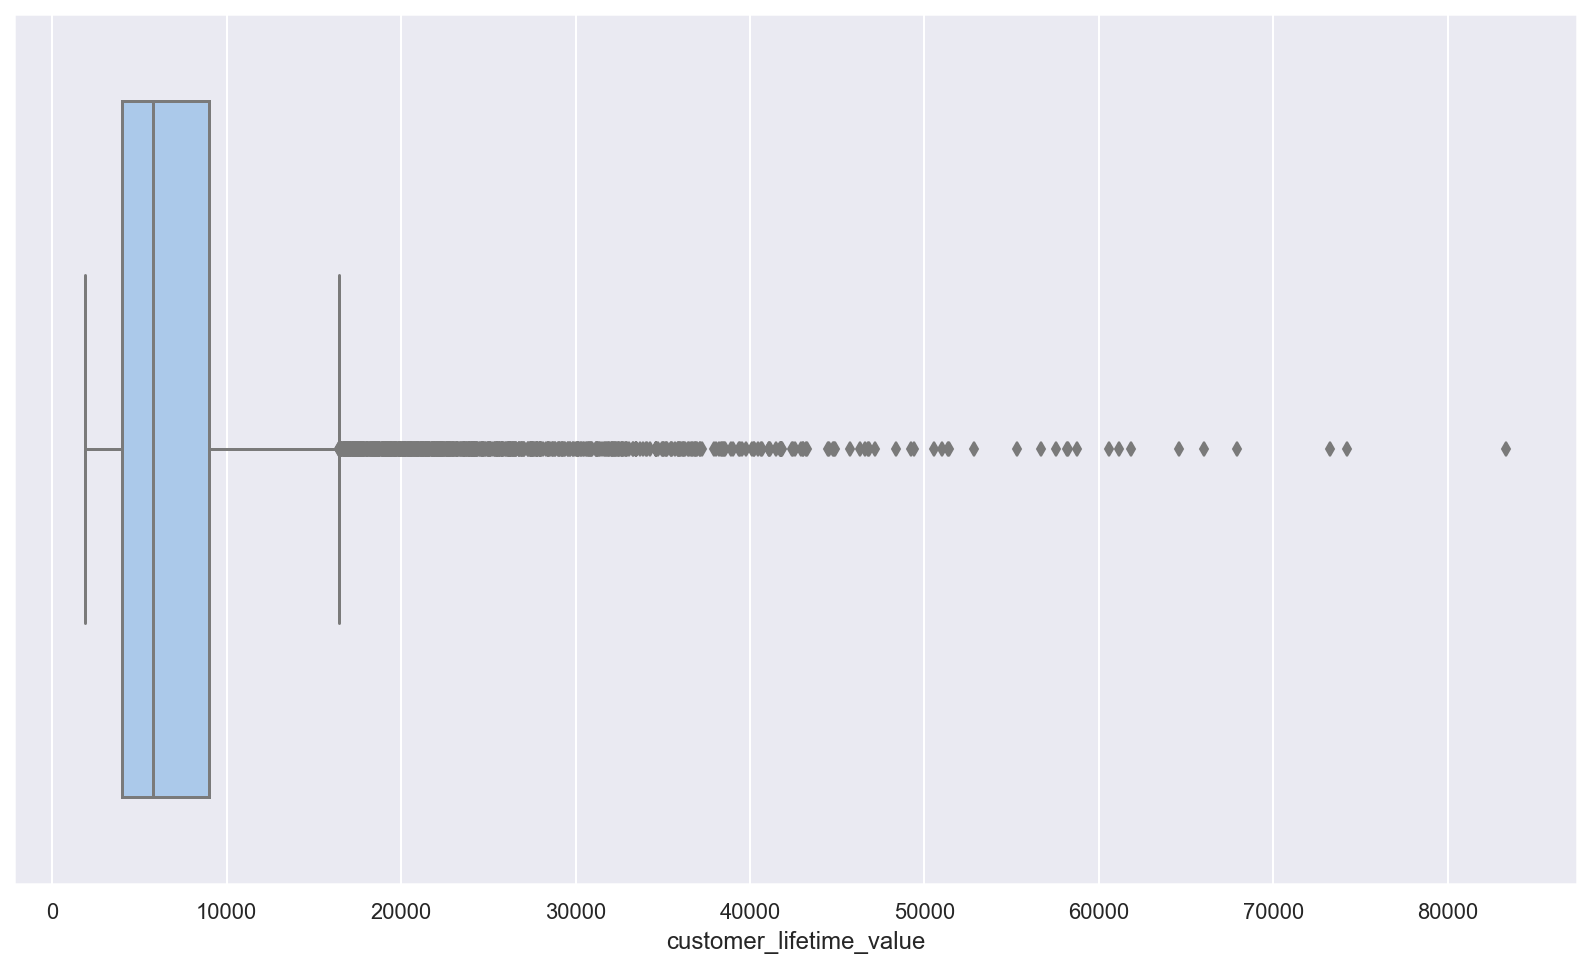

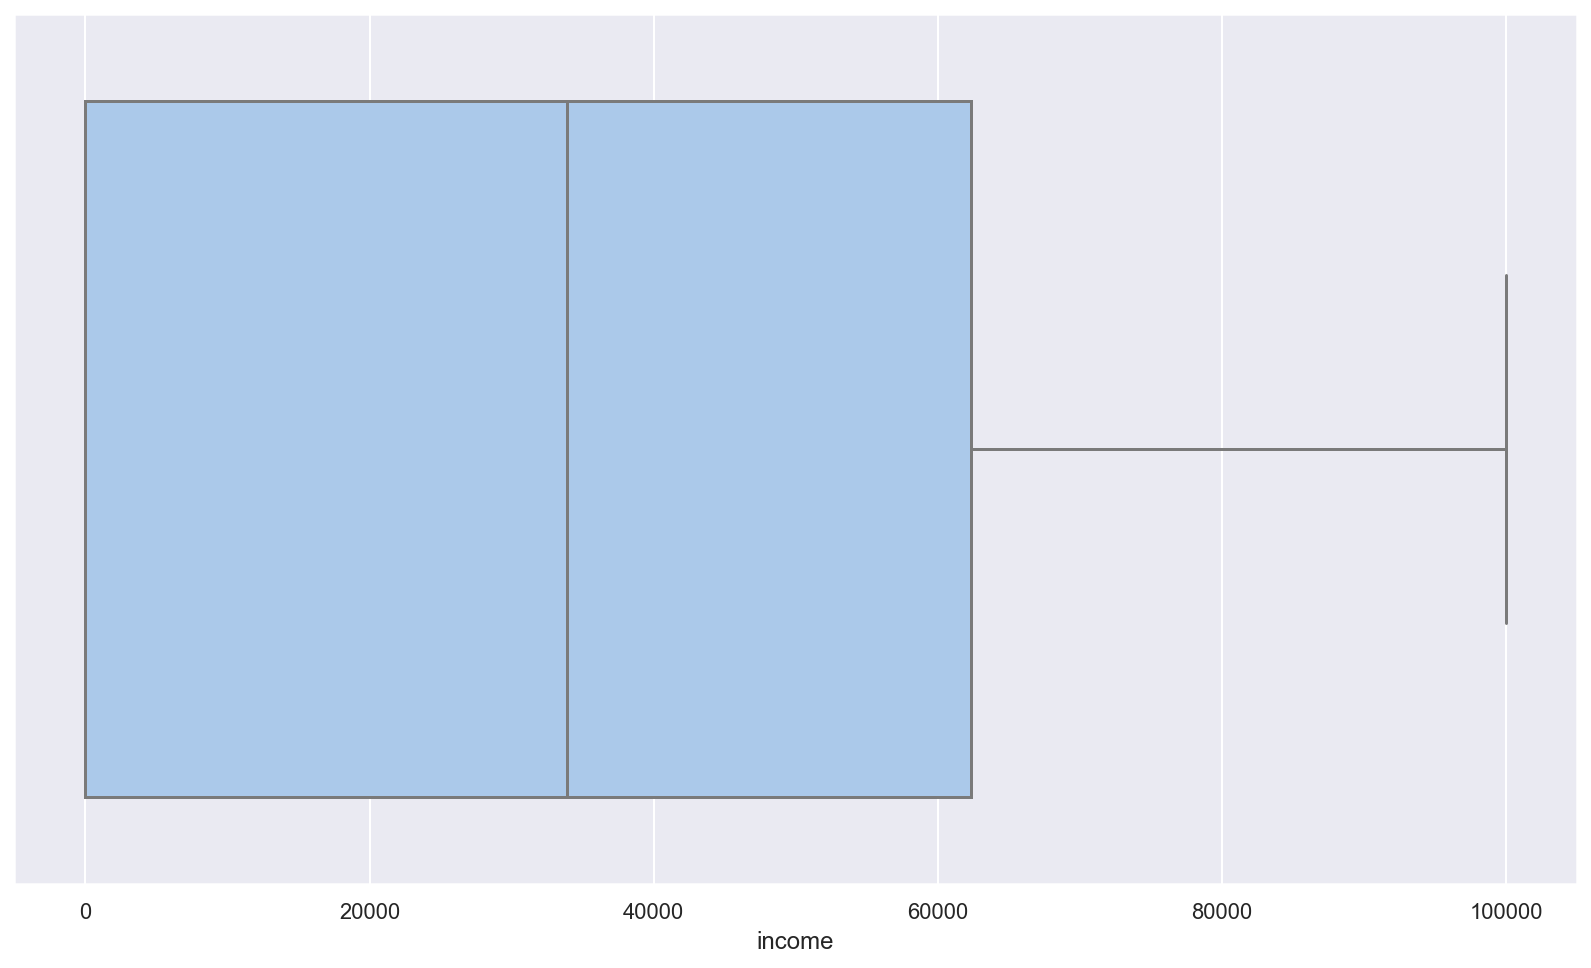

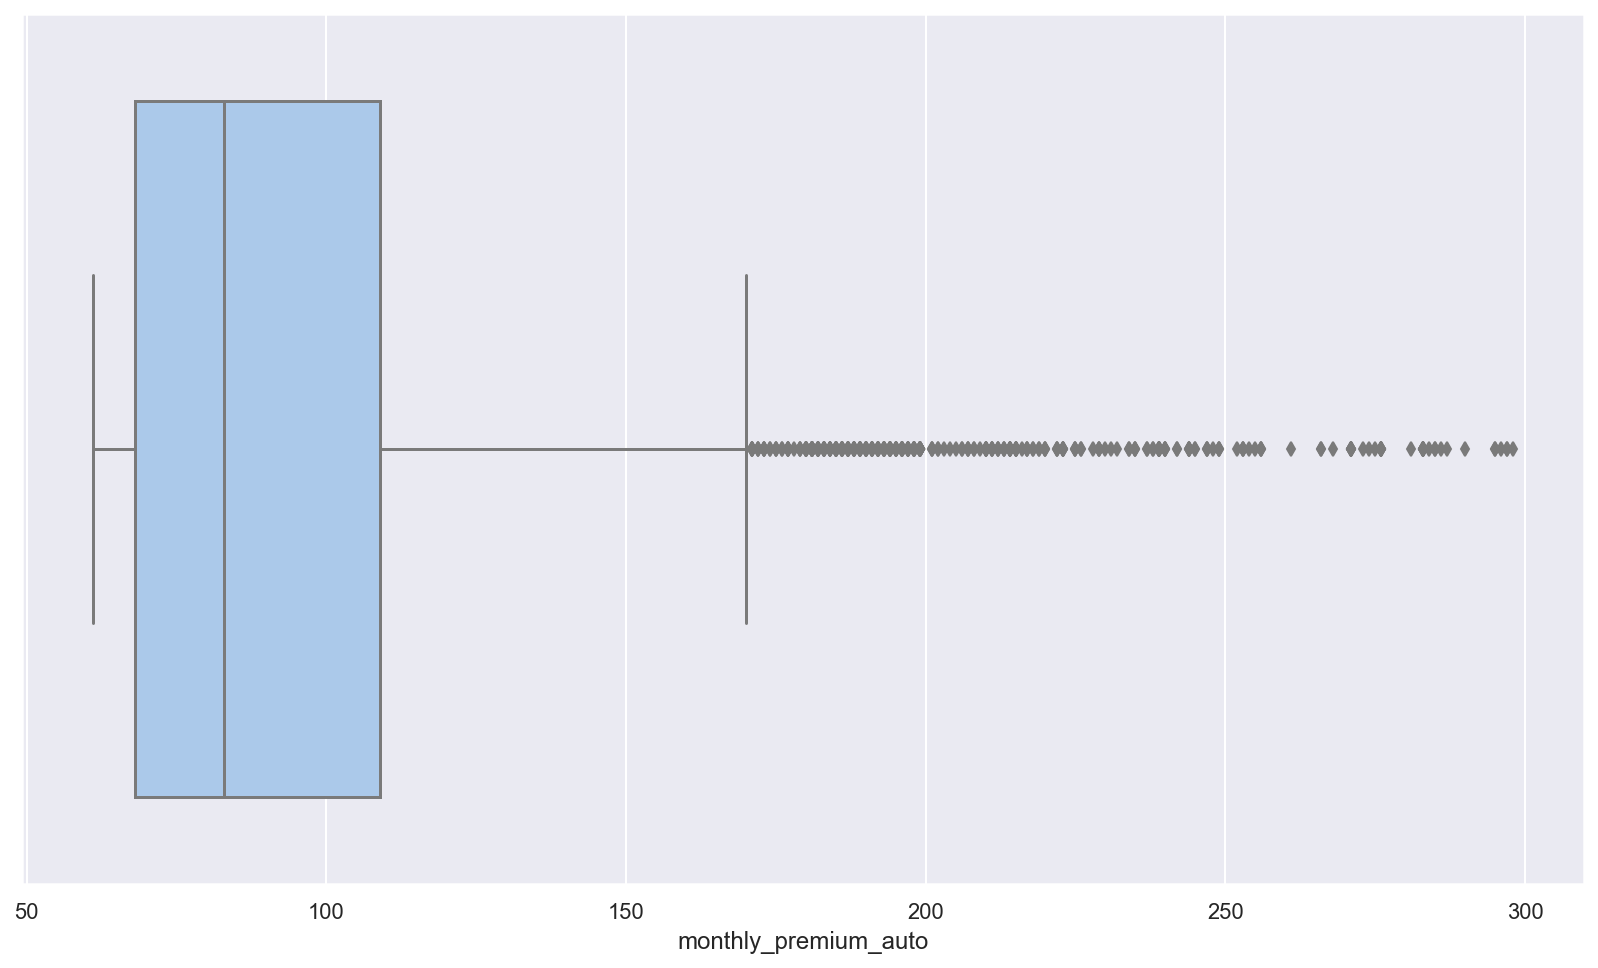

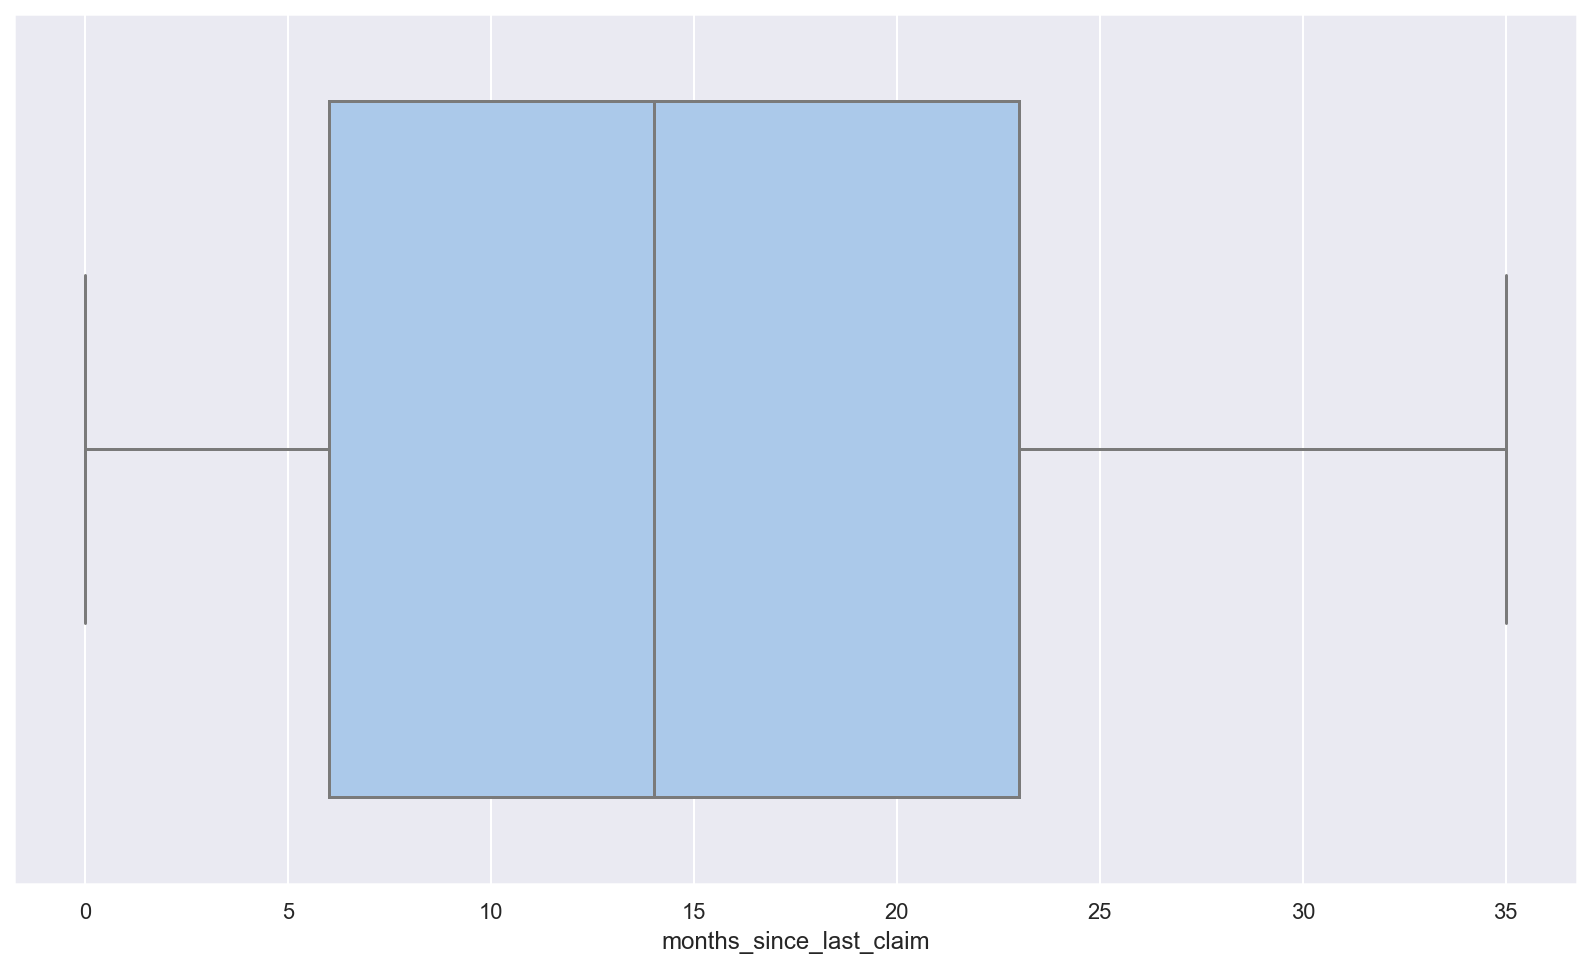

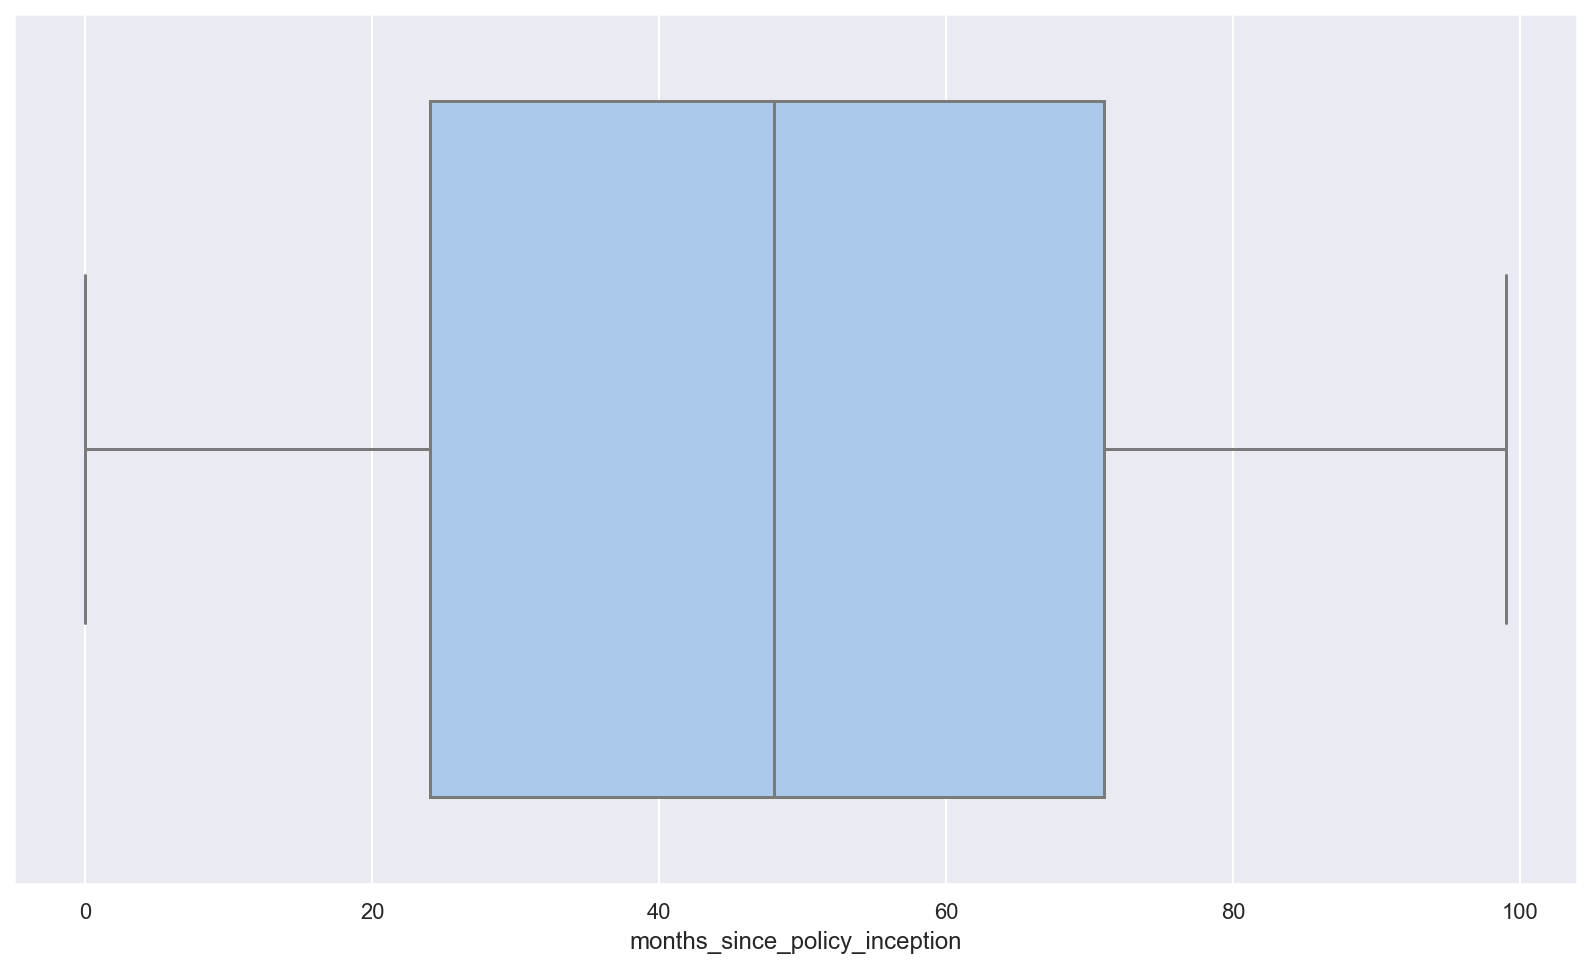

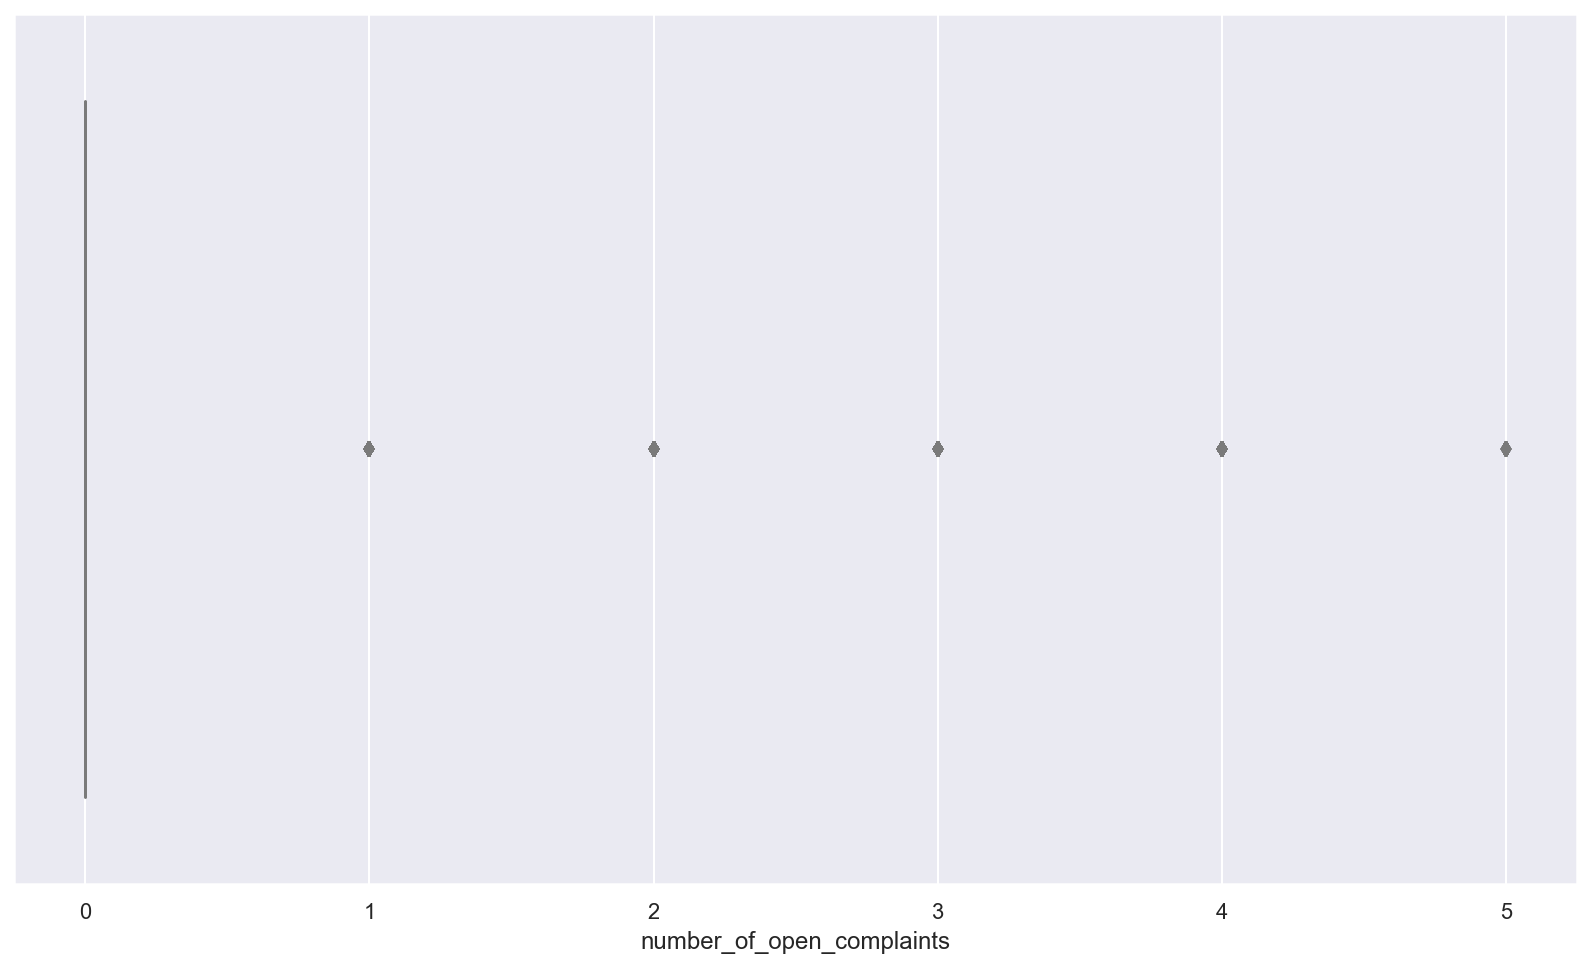

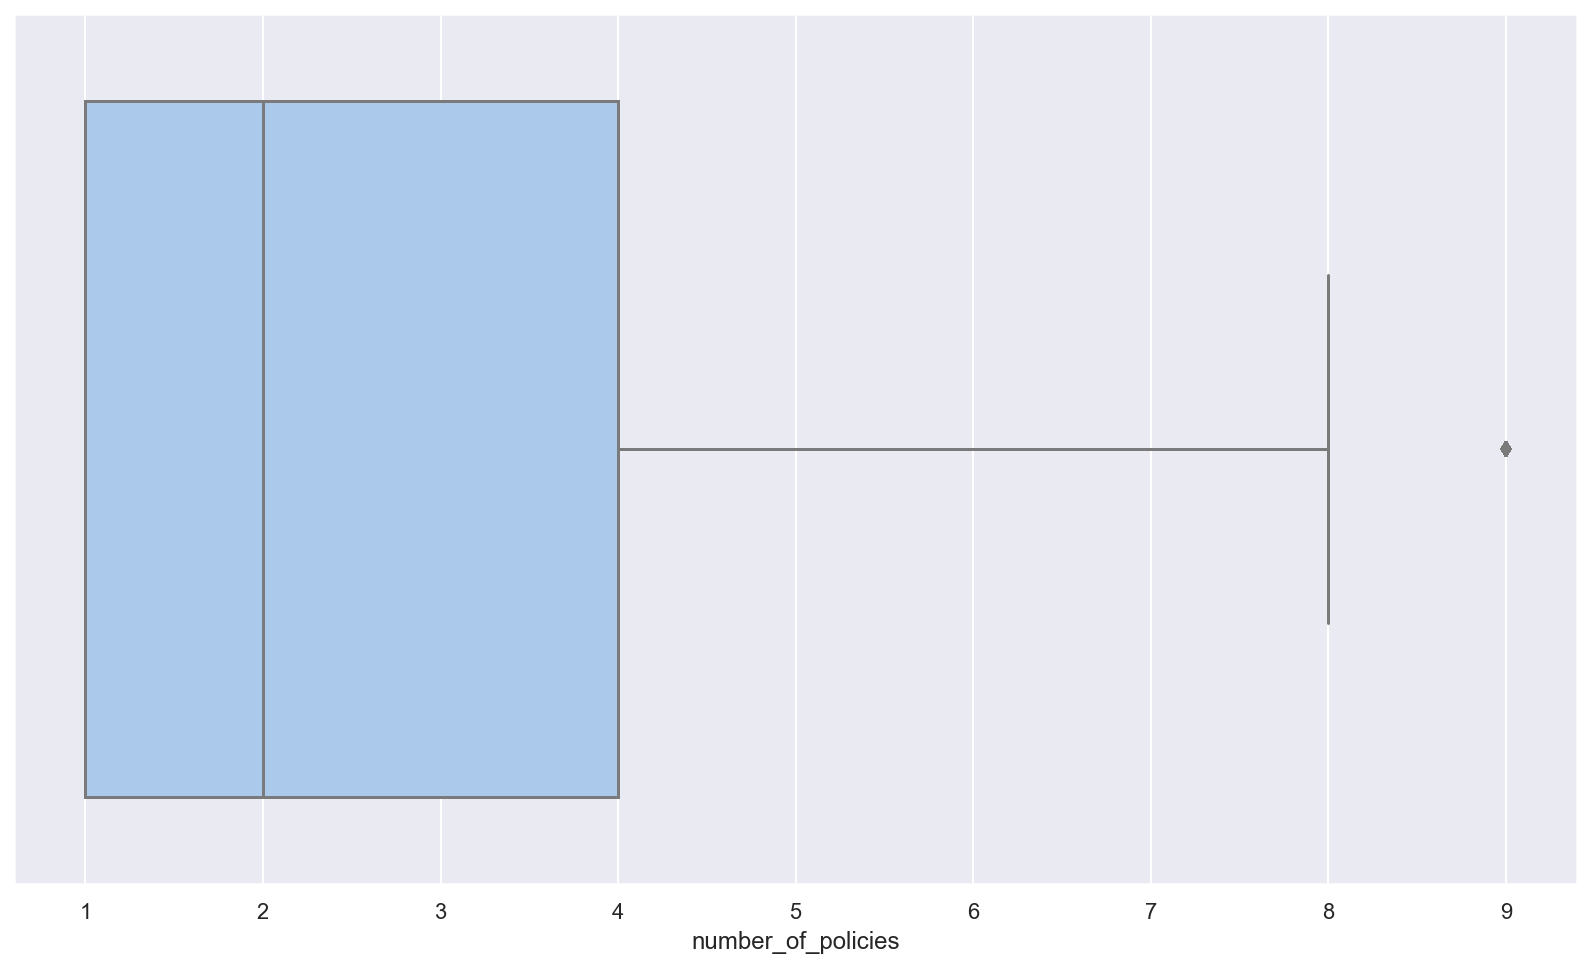

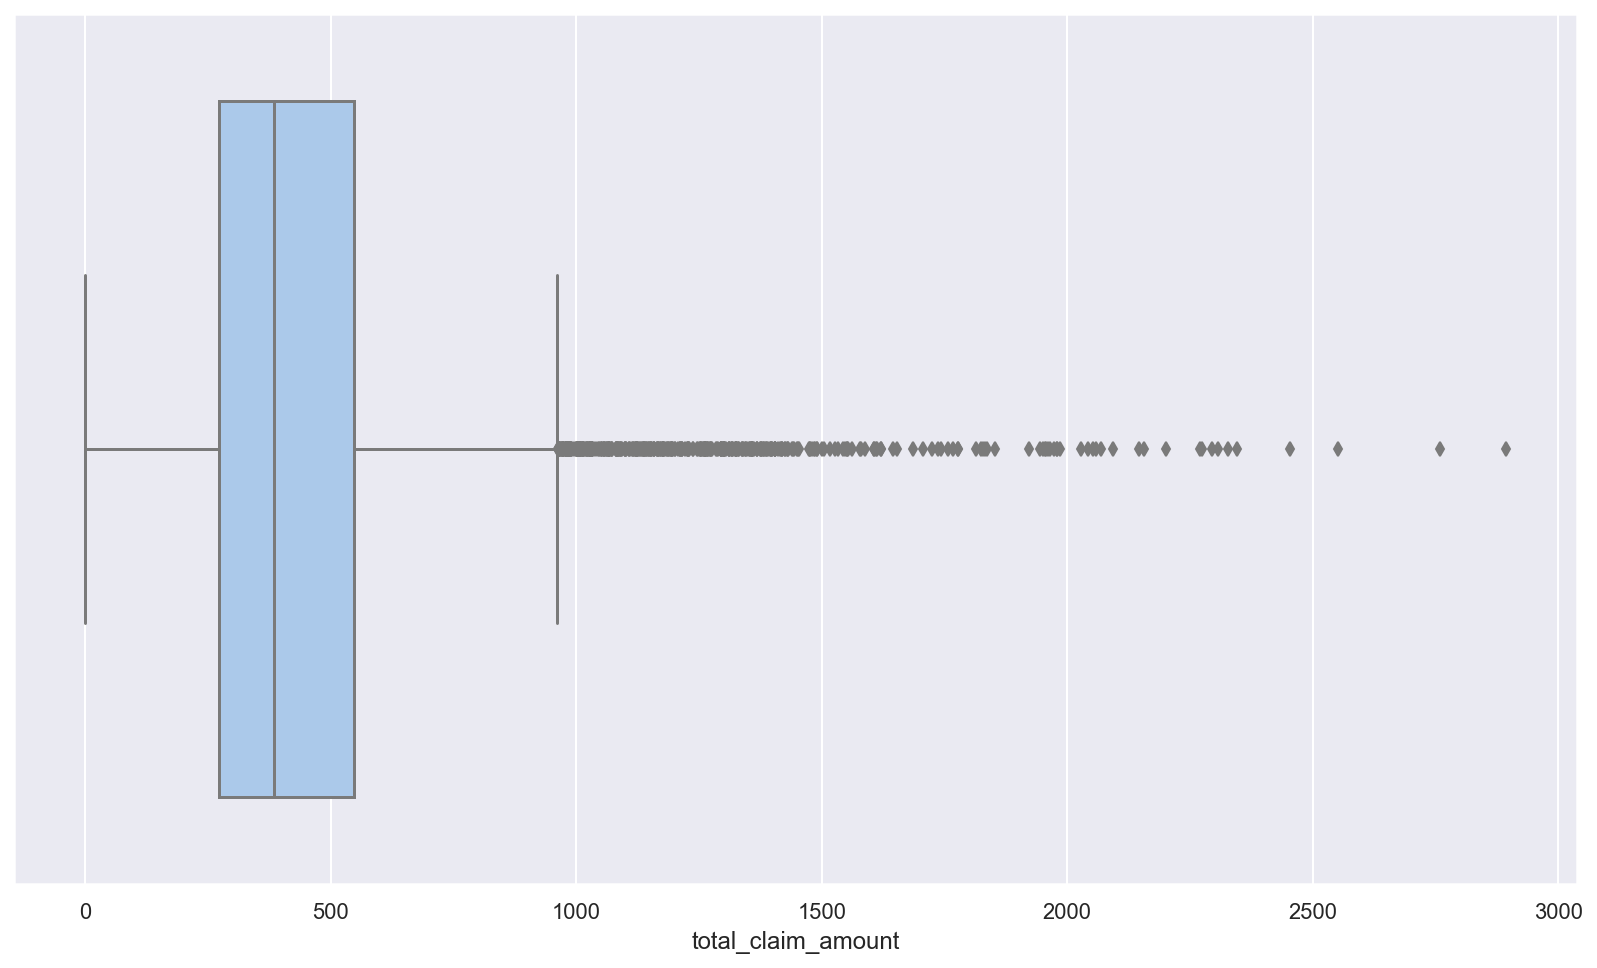

In [7]:
for column in numerical_df:
    sns.boxplot(numerical_df[column])
    plt.show()

In [8]:
def drop_outlier(data,column):
    print("old shape: ", data.shape)                    # dataframe shape before drops
        
    Q1 = data[column].quantile(0.25) # first quantile
    Q3 = data[column].quantile(0.75) # third quantile
    IQR = Q3 - Q1                    # inter quantile range

    data = data[~(                        # negation so we get the datapoints within the whiskers
        (data[column] < (Q1 - 1.5 * IQR)) # datapoints left of the "left whisker"
        |(data[column] > (Q3 + 1.5 * IQR) # datapoints right of the 'right whisker'
        ))]

    print("new shape: ", data.shape)                    # data frame shape after drops
    data.reset_index(drop=True, inplace=True)           # reset the index (to avoid NaNs later)
    return data

In [9]:
df = drop_outlier(df,"total_claim_amount")

old shape:  (9134, 23)
new shape:  (8681, 23)


### Create a copy of the Datasets

In [10]:
df2 = df.copy()
numerical_df2 = df2.select_dtypes(np.number)
categorical_df2 = df2.select_dtypes(object)

### Normalize Continuos variables

In [12]:
from sklearn.preprocessing import MinMaxScaler
min_max_transformer = MinMaxScaler()

In [13]:
x = numerical_df2.values
x_scaled = min_max_transformer.fit_transform(x)
numerical_df2=pd.DataFrame(x_scaled, columns=numerical_df2.columns)

In [14]:
categorical_df2["coverage"] = categorical_df2["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
categorical_df2["employmentstatus"] = categorical_df2["employmentstatus"].map({"Employed" : 0, "Unemployed" : 1, "Medical Leave" : 2, "Disabled" : 3, "Retired" : 4})
categorical_df2["location_code"] = categorical_df2["location_code"].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2})
categorical_df2["vehicle_size"] = categorical_df2["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})

In [15]:

dummies_list = ["state", "marital_status", "policy_type", "policy", "renew_offer_type","sales_channel", "vehicle_size"]

In [16]:
categorical_df2 = pd.get_dummies(categorical_df2, prefix=dummies_list, columns=dummies_list, drop_first = True)

In [18]:
time_df2 = pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
time_df2["day"] = df2['effective_to_date'].dt.day
time_df2["month"] = df2['effective_to_date'].dt.month
time_df2["year"] = df2['effective_to_date'].dt.year
time_df2

,day,month,year
0,24,2,2011
1,19,2,2011
2,20,1,2011
3,3,2,2011
4,25,1,2011
...,...,...,...
8676,10,2,2011
8677,12,2,2011
8678,6,2,2011
8679,3,2,2011


In [22]:
df2 = pd.concat([categorical_df2, numerical_df2, time_df2], axis =1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8681 entries, 0 to 8680
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   response                       8681 non-null   object 
 1   coverage                       8681 non-null   int64  
 2   education                      8681 non-null   object 
 3   employmentstatus               8681 non-null   int64  
 4   gender                         8681 non-null   object 
 5   location_code                  8681 non-null   int64  
 6   vehicle_class                  8681 non-null   object 
 7   state_California               8681 non-null   uint8  
 8   state_Nevada                   8681 non-null   uint8  
 9   state_Oregon                   8681 non-null   uint8  
 10  state_Washington               8681 non-null   uint8  
 11  marital_status_Married         8681 non-null   uint8  
 12  marital_status_Single          8681 non-null   u

In [23]:
dummies_list = ["response", "education", "gender", "vehicle_class"]
df2 = pd.get_dummies(df2, prefix=dummies_list, columns=dummies_list, drop_first = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8681 entries, 0 to 8680
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   coverage                        8681 non-null   int64  
 1   employmentstatus                8681 non-null   int64  
 2   location_code                   8681 non-null   int64  
 3   state_California                8681 non-null   uint8  
 4   state_Nevada                    8681 non-null   uint8  
 5   state_Oregon                    8681 non-null   uint8  
 6   state_Washington                8681 non-null   uint8  
 7   marital_status_Married          8681 non-null   uint8  
 8   marital_status_Single           8681 non-null   uint8  
 9   policy_type_Personal Auto       8681 non-null   uint8  
 10  policy_type_Special Auto        8681 non-null   uint8  
 11  policy_Corporate L2             8681 non-null   uint8  
 12  policy_Corporate L3             86

In [24]:
df2


,coverage,employmentstatus,location_code,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_type_Personal Auto,...,education_College,education_Doctor,education_High School or Below,education_Master,gender_M,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,0,0,0,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8676,0,0,2,1,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
8677,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8678,1,1,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
8679,1,0,0,1,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,0
